In [1]:
import pyreadr

# Read the .rds file
result = pyreadr.read_r("data.rds")

# Access the DataFrame
pdf = result[None
             ] # If there is only one object in the .rds file
print(pdf)



        Mallin       Dates       Evap      NDVI         PP      Snow  \
0     Mallin01  2000-02-18 -15.497504 -0.026828  32.305380  0.000000   
1     Mallin01  2000-03-05  -6.465505 -0.014511  -2.551543 -0.097355   
2     Mallin01  2000-03-21  -2.339845 -0.061481   3.677923 -0.263772   
3     Mallin01  2000-04-06   1.891963 -0.062019 -11.302790 -0.415628   
4     Mallin01  2000-04-22   2.379994 -0.043949 -11.040732 -1.293315   
...        ...         ...        ...       ...        ...       ...   
5765  Mallin10  2025-01-01  -1.944744  0.014110   2.247054  0.000000   
5766  Mallin10  2025-01-17   3.712995 -0.033750  -4.891473  0.000000   
5767  Mallin10  2025-02-02   5.979186 -0.113712  -7.396970  0.000000   
5768  Mallin10  2025-02-18   7.489040 -0.075637  -7.891178  0.000000   
5769  Mallin10  2025-03-06   7.824455       NaN  -7.816820  0.000000   

           Tmax       Tmin  
0    -89.106775 -39.715955  
1    -16.925692 -35.627797  
2    -33.262322  -5.549931  
3    -20.179702 -19

In [91]:
import polars as pl

pdf.convert_dtypes(dtype_backend="pyarrow")
df = pl.from_pandas(pdf)
print(df)

df =df.with_columns(
    pl.col("Dates").dt.ordinal_day().alias("day"),
    pl.col("Dates").dt.month().alias("month"),
    pl.col("Dates").dt.year().alias("year"),
    pl.col("Dates").dt.to_string("%Y").alias("year_str"),
)
print(df)
print(df.null_count())
df = df.drop_nulls()
print(df)


shape: (5_770, 8)
┌──────────┬────────────┬────────────┬───────────┬────────────┬───────────┬────────────┬───────────┐
│ Mallin   ┆ Dates      ┆ Evap       ┆ NDVI      ┆ PP         ┆ Snow      ┆ Tmax       ┆ Tmin      │
│ ---      ┆ ---        ┆ ---        ┆ ---       ┆ ---        ┆ ---       ┆ ---        ┆ ---       │
│ str      ┆ date       ┆ f64        ┆ f64       ┆ f64        ┆ f64       ┆ f64        ┆ f64       │
╞══════════╪════════════╪════════════╪═══════════╪════════════╪═══════════╪════════════╪═══════════╡
│ Mallin01 ┆ 2000-02-18 ┆ -15.497504 ┆ -0.026828 ┆ 32.30538   ┆ 0.0       ┆ -89.106775 ┆ -39.71595 │
│          ┆            ┆            ┆           ┆            ┆           ┆            ┆ 5         │
│ Mallin01 ┆ 2000-03-05 ┆ -6.465505  ┆ -0.014511 ┆ -2.551543  ┆ -0.097355 ┆ -16.925692 ┆ -35.62779 │
│          ┆            ┆            ┆           ┆            ┆           ┆            ┆ 7         │
│ Mallin01 ┆ 2000-03-21 ┆ -2.339845  ┆ -0.061481 ┆ 3.677923   ┆ -0.263772

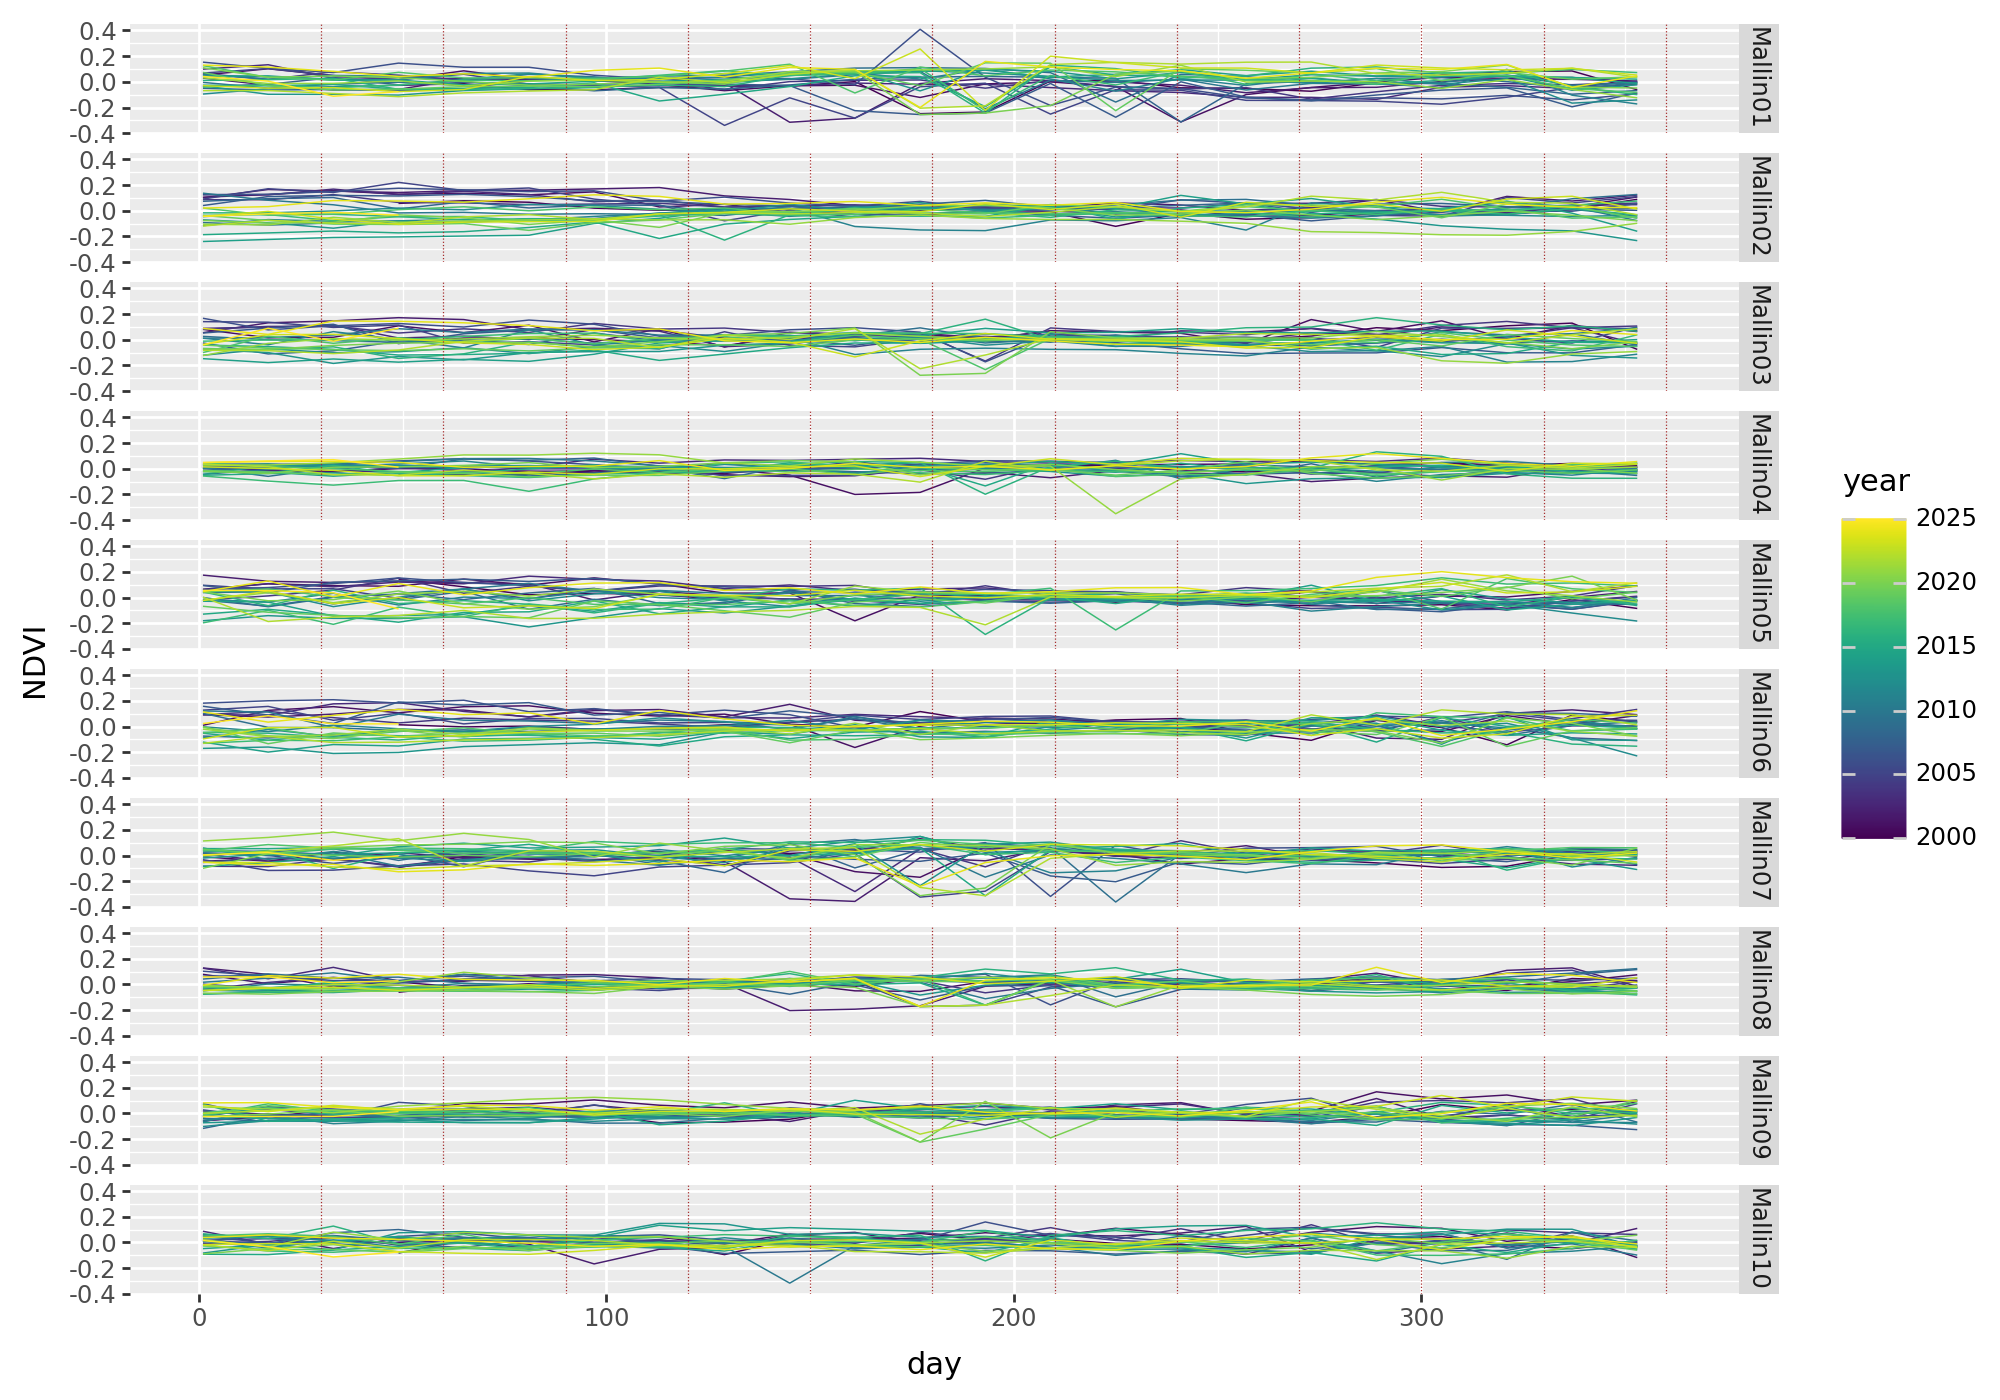

In [129]:

import plotnine as gg
df2 = df
#df2 = df[df["Mallin"]=="Mallin01"]

(
    gg.ggplot(df2, gg.aes(x='day', y="NDVI",color="year",group="year"))
    + gg.geom_line(size=0.3)
    + gg.geom_vline(xintercept=[i*30 for i in range(1,13)],color="brown", size=0.25,linetype="dotted")  
    + gg.theme(figure_size=(10, 7))
    +gg.facet_grid("Mallin") 
).show()



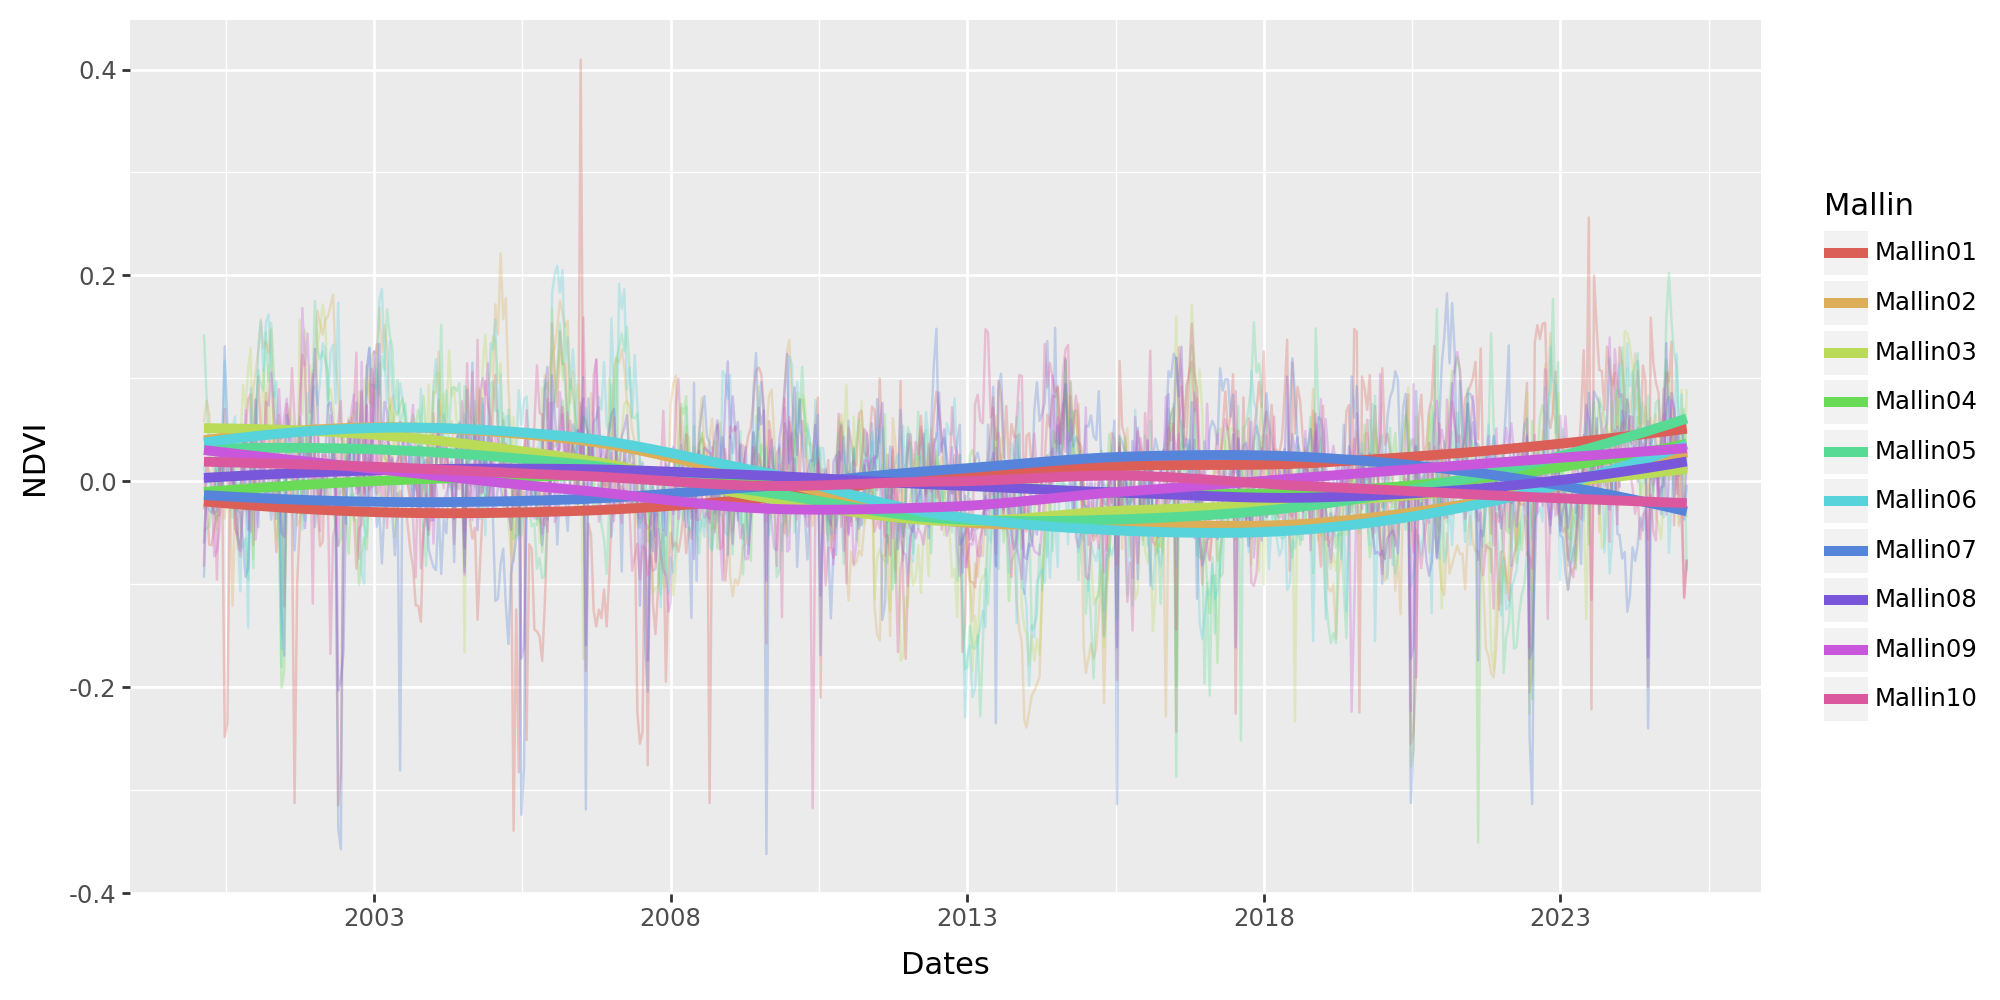

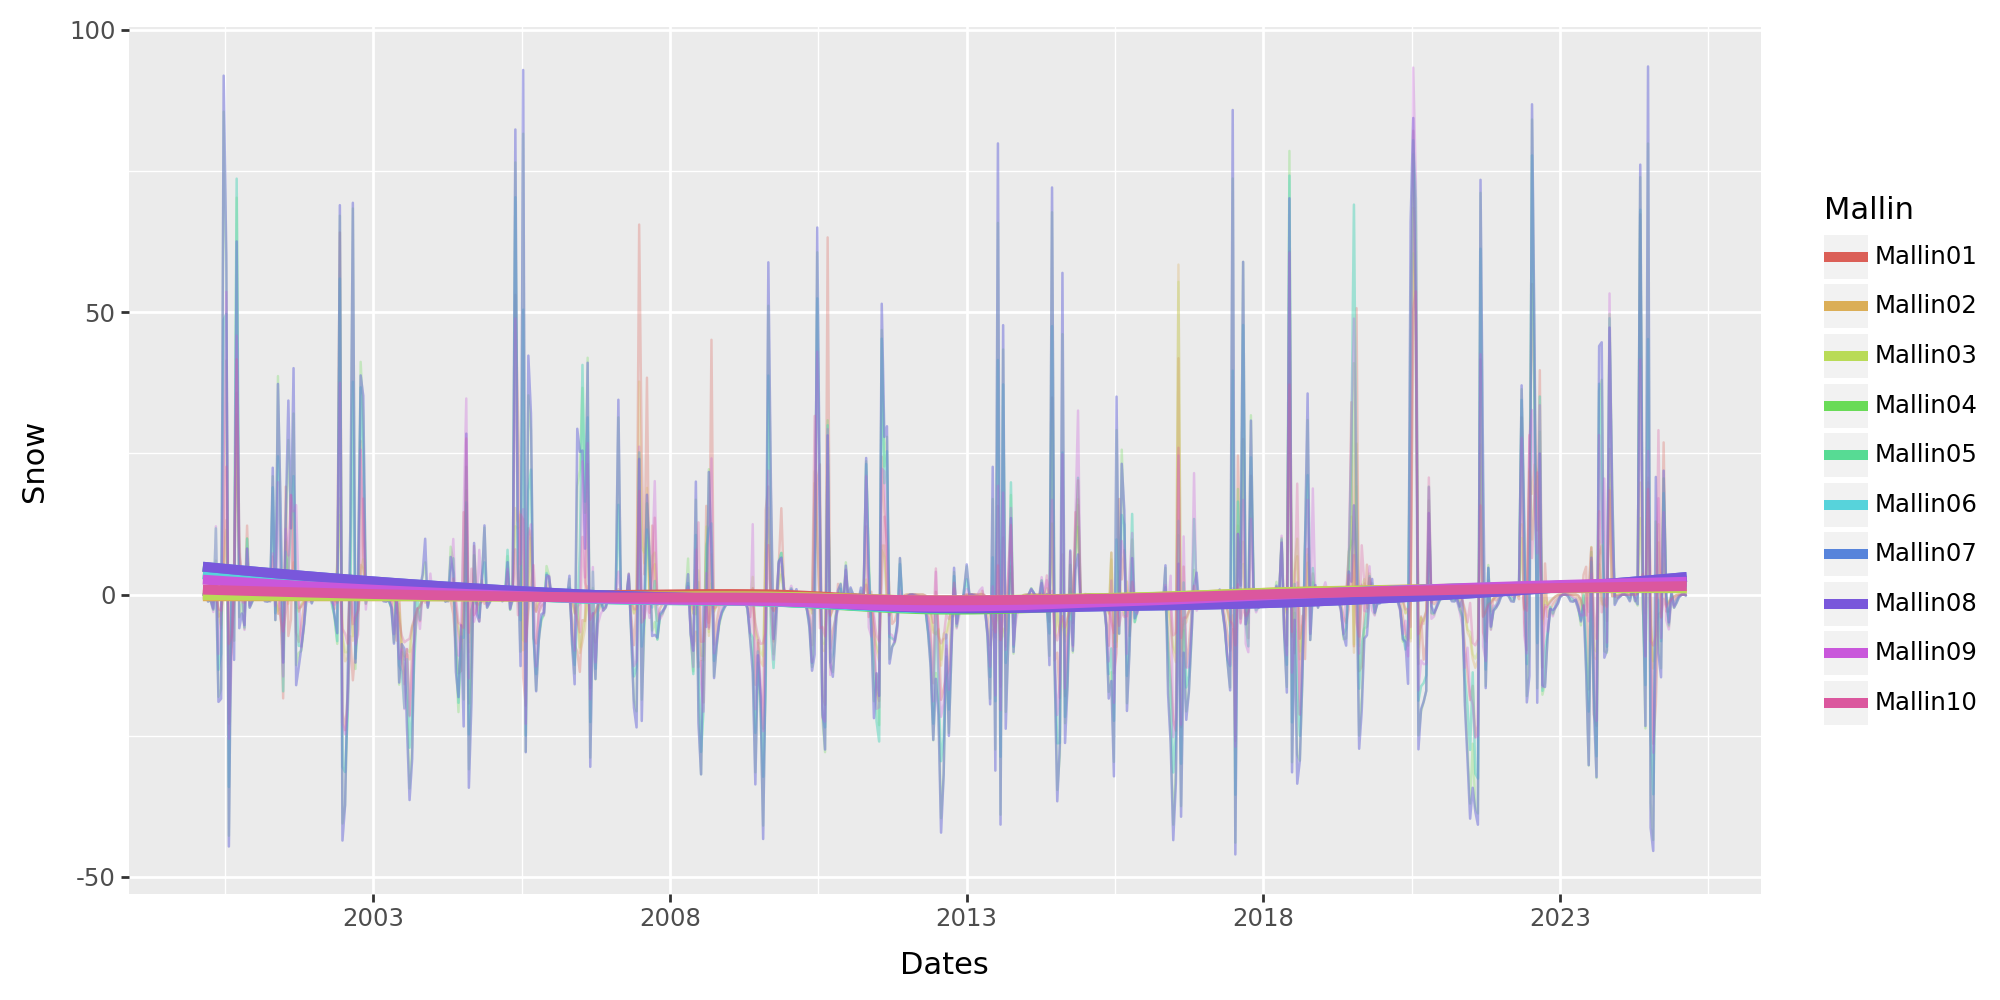

In [127]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

def interaction(*cats, sep="."):
    cats = [c.astype(str) for c in cats]
    return [sep.join(items) for items in zip(*cats)]

for y in ["NDVI","Snow"]:
    (gg.ggplot(df2, gg.aes(x='Dates', y=y,color="Mallin"))
        + gg.geom_line(alpha=0.3)
        + gg.geom_smooth(method="loess",size=2,se=False)
        + gg.theme(figure_size=(10, 5))
        + gg.scale_x_datetime(
        breaks=date_breaks(width="5 years"), labels=date_format("%Y")
    ) 
    ).show()

  



/home/fquiroga/dev/mallin/.venv/lib/python3.10/site-packages/mizani/palettes.py:705: UserWarning: Palette can return a maximum of 13 values. 26 values requested.
/home/fquiroga/dev/mallin/.venv/lib/python3.10/site-packages/mizani/palettes.py:705: UserWarning: Palette can return a maximum of 13 values. 26 values requested.


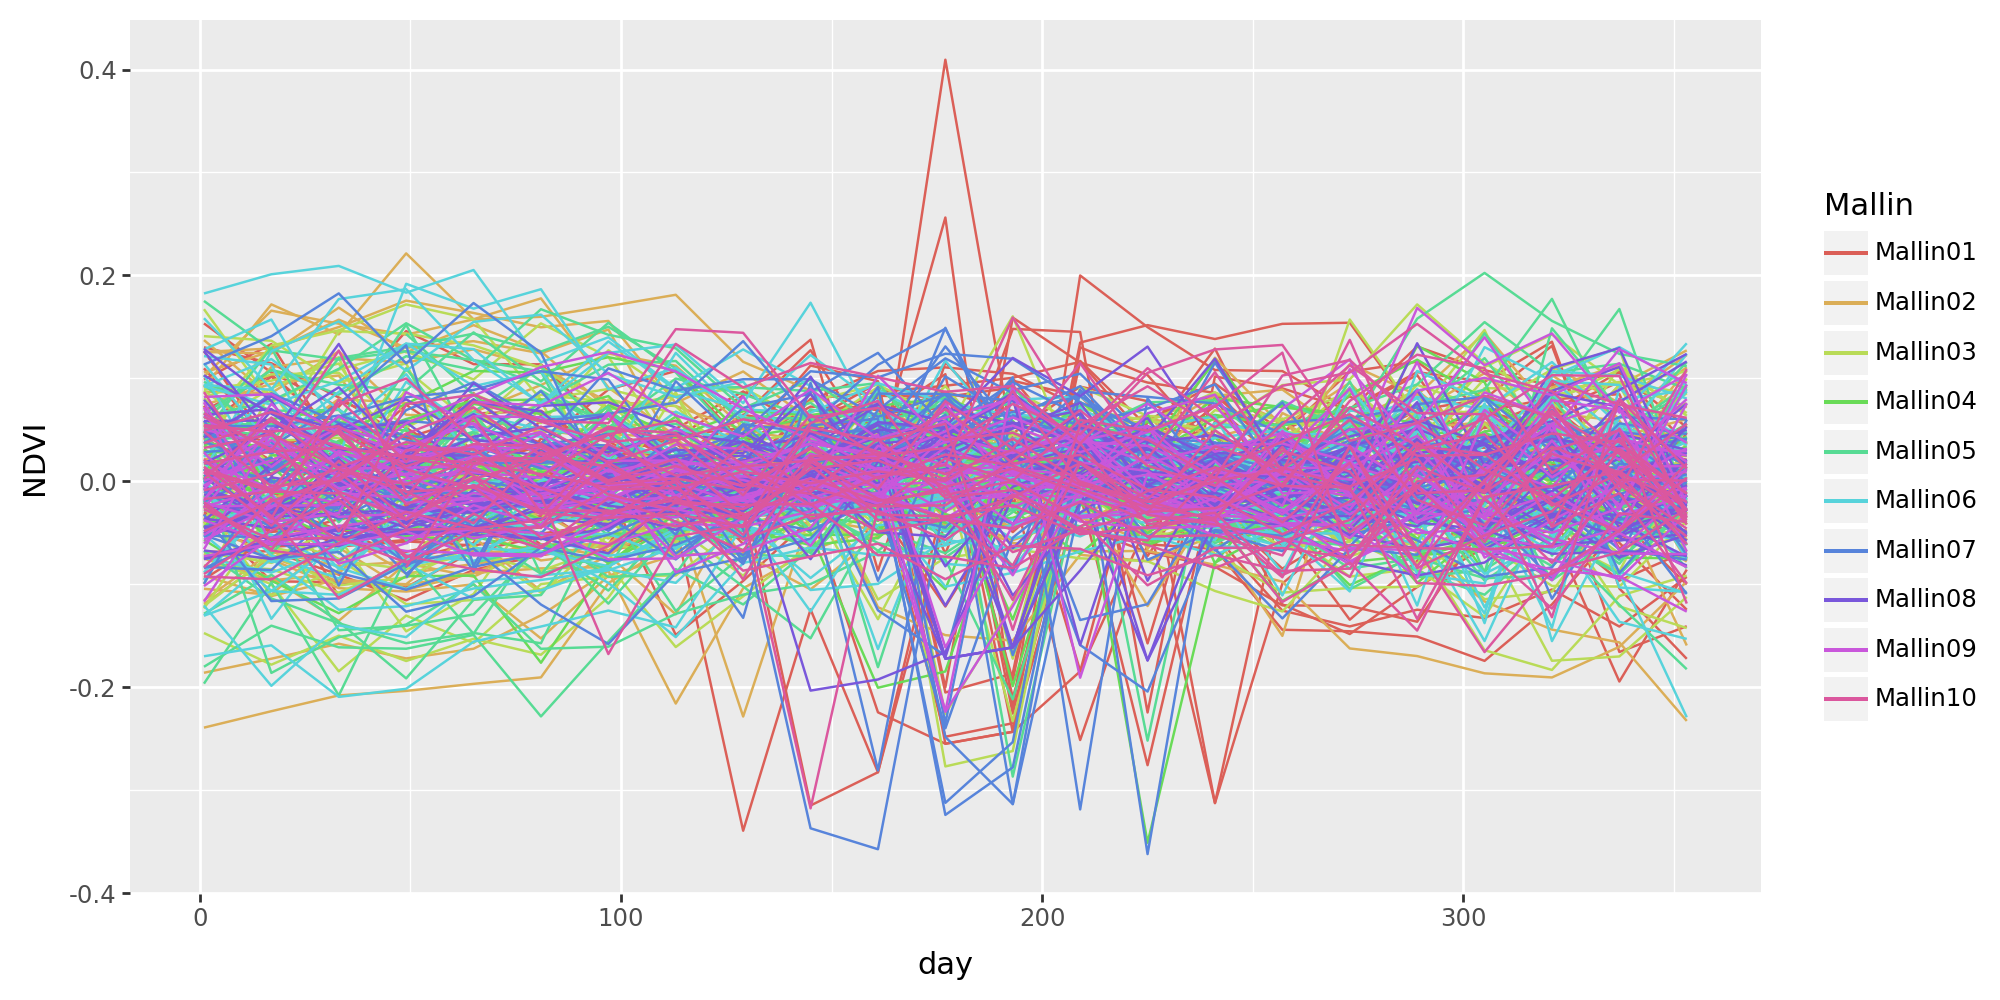

In [124]:
y = "NDVI"

(gg.ggplot(df2)
    + gg.geom_line(gg.aes(x='day', y="NDVI", color="Mallin", shape="year_str"))
    + gg.theme(figure_size=(10, 5))
).show()


In [115]:
a=df2.filter(pl.col("year")==2000).select(pl.col("day")).to_numpy()
print(a)

[[ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]
 [ 97]
 [113]
 [129]
 [145]
 [161]
 [177]
 [193]
 [209]
 [225]
 [241]
 [257]
 [273]
 [289]
 [305]
 [321]
 [337]
 [353]
 [ 49]
 [ 65]
 [ 81]